In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# 1. Reddit Data

## 1.1 Title of subreddits posts

In [206]:
reddit = pd.read_csv('new_reddit.csv', encoding='utf-8-sig')
reddit['NEW_BODY']= reddit['NEW_BODY'].astype(str)
print(reddit.shape)
reddit.head()

(5979, 8)


,SCORE,ID,SUBREDDIT,NUM_COMMENTS,TIMESTAMP,NEW_TITLE,NEW_BODY,TIME_OF_DAY
0,45,g94qma,SuggestALaptop,0,2020/04/28 09:06:12,Ignore Private Messages Suggesting Laptops,The primary aim of SuggestALaptop is to provid...,Morning
1,42,ekkvox,SuggestALaptop,2,2020/01/06 15:23:07,SuggestALaptop Stress Test Project! Submit and...,Laptops this gen often have thermal or TDP thr...,Afternoon
2,16,gqt1pd,SuggestALaptop,15,2020/05/27 00:20:20,I need a laptop for gaming coding video editin...,LAPTOP QUESTIONNAIRE x200B Total budget in loc...,Night
3,5,gqv6vt,SuggestALaptop,1,2020/05/27 03:22:56,So I can't buy this yet?,If I can buy it where do I find it? Total budg...,Night
4,16,gqp7ra,SuggestALaptop,30,2020/05/26 19:15:01,Alienware M15 vs Lenovo Y740?,Any thoughts on which is potentially better? T...,Evening


In [207]:
sentiments = []
for line in reddit.NEW_TITLE:
    pol_score = analyser.polarity_scores(line)
    pol_score['NEW_TITLE'] = line
    sentiments.append(pol_score)

In [208]:
df_title_sentiments = pd.DataFrame.from_records(sentiments)
df_title_sentiments.rename(columns = {'NEW_TITLE':'reddit_title'}, inplace = True)
df_title_sentiments.head()

,neg,neu,pos,compound,reddit_title
0,0.385,0.615,0.0,-0.3612,Ignore Private Messages Suggesting Laptops
1,0.297,0.703,0.0,-0.5242,SuggestALaptop Stress Test Project! Submit and...
2,0.000,1.000,0.0,0.0000,I need a laptop for gaming coding video editin...
3,0.000,1.000,0.0,0.0000,So I can't buy this yet?
4,0.000,1.000,0.0,0.0000,Alienware M15 vs Lenovo Y740?


In [209]:
df_title_sentiments['sentiments'] = 0
df_title_sentiments.loc[df_title_sentiments['compound'] > 0.05, 'sentiments'] = 1
df_title_sentiments.loc[df_title_sentiments['compound'] < -0.05, 'sentiments'] = -1
print(df_title_sentiments.shape)
df_title_sentiments.head()

(5979, 6)


,neg,neu,pos,compound,reddit_title,sentiments
0,0.385,0.615,0.0,-0.3612,Ignore Private Messages Suggesting Laptops,-1
1,0.297,0.703,0.0,-0.5242,SuggestALaptop Stress Test Project! Submit and...,-1
2,0.000,1.000,0.0,0.0000,I need a laptop for gaming coding video editin...,0
3,0.000,1.000,0.0,0.0000,So I can't buy this yet?,0
4,0.000,1.000,0.0,0.0000,Alienware M15 vs Lenovo Y740?,0


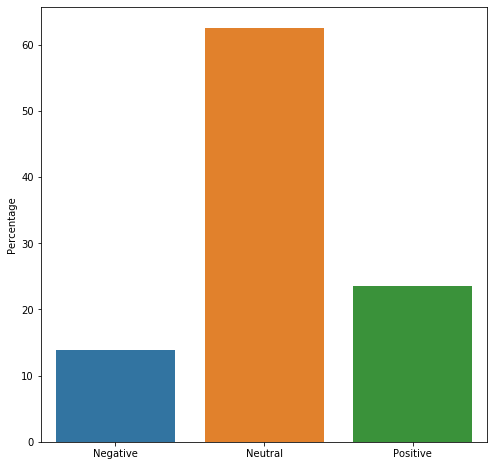

In [210]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df_title_sentiments.sentiments.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [211]:
#append to original dataframe
reddit.reset_index(drop=True, inplace=True)
df_title_sentiments.reset_index(drop=True, inplace=True)
df_redditSentiments = pd.concat([reddit, df_title_sentiments], axis=1)
#drop unnecessary column
df_redditSentiments = df_redditSentiments.drop(["reddit_title"], axis=1)
#change column names
df_redditSentiments.rename(columns = {'neg':'NEG_TITLE'}, inplace = True)
df_redditSentiments.rename(columns = {'neu':'NEU_TITLE'}, inplace = True)
df_redditSentiments.rename(columns = {'pos':'POS_TITLE'}, inplace = True)
df_redditSentiments.rename(columns = {'compound':'COMPOUND_TITLE'}, inplace = True)
df_redditSentiments.rename(columns = {'sentiments':'SENTIMENTS_TITLE'}, inplace = True)
print(df_redditSentiments.shape)
df_redditSentiments.head()

(5979, 13)


,SCORE,ID,SUBREDDIT,NUM_COMMENTS,TIMESTAMP,NEW_TITLE,NEW_BODY,TIME_OF_DAY,NEG_TITLE,NEU_TITLE,POS_TITLE,COMPOUND_TITLE,SENTIMENTS_TITLE
0,45,g94qma,SuggestALaptop,0,2020/04/28 09:06:12,Ignore Private Messages Suggesting Laptops,The primary aim of SuggestALaptop is to provid...,Morning,0.385,0.615,0.0,-0.3612,-1
1,42,ekkvox,SuggestALaptop,2,2020/01/06 15:23:07,SuggestALaptop Stress Test Project! Submit and...,Laptops this gen often have thermal or TDP thr...,Afternoon,0.297,0.703,0.0,-0.5242,-1
2,16,gqt1pd,SuggestALaptop,15,2020/05/27 00:20:20,I need a laptop for gaming coding video editin...,LAPTOP QUESTIONNAIRE x200B Total budget in loc...,Night,0.000,1.000,0.0,0.0000,0
3,5,gqv6vt,SuggestALaptop,1,2020/05/27 03:22:56,So I can't buy this yet?,If I can buy it where do I find it? Total budg...,Night,0.000,1.000,0.0,0.0000,0
4,16,gqp7ra,SuggestALaptop,30,2020/05/26 19:15:01,Alienware M15 vs Lenovo Y740?,Any thoughts on which is potentially better? T...,Evening,0.000,1.000,0.0,0.0000,0


## 1.2 Texts of subreddits posts

In [212]:
sentiments_2 = []
for line in reddit.NEW_BODY:
    pol_score = analyser.polarity_scores(line)
    pol_score['NEW_BODY'] = line
    sentiments_2.append(pol_score)

In [213]:
df_body_sentiments = pd.DataFrame.from_records(sentiments_2)
df_body_sentiments.rename(columns = {'NEW_BODY':'reddit_texts'}, inplace = True)
df_body_sentiments.head()

,neg,neu,pos,compound,reddit_texts
0,0.069,0.829,0.102,0.8062,The primary aim of SuggestALaptop is to provid...
1,0.011,0.844,0.145,0.9575,Laptops this gen often have thermal or TDP thr...
2,0.014,0.813,0.172,0.9895,LAPTOP QUESTIONNAIRE x200B Total budget in loc...
3,0.046,0.787,0.167,0.9628,If I can buy it where do I find it? Total budg...
4,0.000,0.907,0.093,0.8641,Any thoughts on which is potentially better? T...


In [214]:
df_body_sentiments['sentiments'] = 0
df_body_sentiments.loc[df_body_sentiments['compound'] > 0.05, 'sentiments'] = 1
df_body_sentiments.loc[df_body_sentiments['compound'] < -0.05, 'sentiments'] = -1
print(df_body_sentiments.shape)
df_body_sentiments.head()

(5979, 6)


,neg,neu,pos,compound,reddit_texts,sentiments
0,0.069,0.829,0.102,0.8062,The primary aim of SuggestALaptop is to provid...,1
1,0.011,0.844,0.145,0.9575,Laptops this gen often have thermal or TDP thr...,1
2,0.014,0.813,0.172,0.9895,LAPTOP QUESTIONNAIRE x200B Total budget in loc...,1
3,0.046,0.787,0.167,0.9628,If I can buy it where do I find it? Total budg...,1
4,0.000,0.907,0.093,0.8641,Any thoughts on which is potentially better? T...,1


In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df_body_sentiments.sentiments.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [ ]:
#append to original dataframe
df_redditSentiments.reset_index(drop=True, inplace=True)
df_body_sentiments.reset_index(drop=True, inplace=True)
reddit_sentiments = pd.concat([df_redditSentiments, df_body_sentiments], axis=1)
#drop unnecessary column
reddit_sentiments = reddit_sentiments.drop(["reddit_texts"], axis=1)
#change column names
reddit_sentiments.rename(columns = {'neg':'NEG_BODY'}, inplace = True)
reddit_sentiments.rename(columns = {'neu':'NEU_BODY'}, inplace = True)
reddit_sentiments.rename(columns = {'pos':'POS_BODY'}, inplace = True)
reddit_sentiments.rename(columns = {'compound':'COMPOUND_BODY'}, inplace = True)
reddit_sentiments.rename(columns = {'sentiments':'SENTIMENTS_BODY'}, inplace = True)
print(reddit_sentiments.head(3))
#save the dataframe as csv file
reddit_sentiments.to_csv('reddit_sentiments.csv', index = False, header=True, encoding='utf-8-sig')

# 2. Comments under Subreddits Data

In [ ]:
comments = pd.read_csv('new_comments.csv', encoding='utf-8-sig')
comments.head()

In [ ]:
sentiments_3 = []
for line in comments.NEW_COMMENTS:
    pol_score = analyser.polarity_scores(line)
    pol_score['NEW_COMMENTS'] = line
    sentiments_3.append(pol_score)

In [ ]:
df_comments_sentiments = pd.DataFrame.from_records(sentiments_3)
df_comments_sentiments.rename(columns = {'NEW_COMMENTS':'reddit_comments'}, inplace = True)
df_comments_sentiments.head()

In [ ]:
df_comments_sentiments['sentiments'] = 0
df_comments_sentiments.loc[df_comments_sentiments['compound'] > 0.05, 'sentiments'] = 1
df_comments_sentiments.loc[df_comments_sentiments['compound'] < -0.05, 'sentiments'] = -1
print(df_comments_sentiments.shape)
df_comments_sentiments.head()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df_comments_sentiments.sentiments.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [ ]:
#append to original dataframe
comments.reset_index(drop=True, inplace=True)
df_comments_sentiments.reset_index(drop=True, inplace=True)
comments_sentiments = pd.concat([comments, df_comments_sentiments], axis=1)
#drop unnecessary column
comments_sentiments = comments_sentiments.drop(["reddit_comments"], axis=1)
#save the dataframe as csv file
comments_sentiments.to_csv('comments_sentiments.csv', index = False, header=True, encoding='utf-8-sig')